# Clouds

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import konrad
import typhon as ty


ty.plots.styles.use()

## Clear-sky background

(100000.00000000001, 0.5829979815268262)

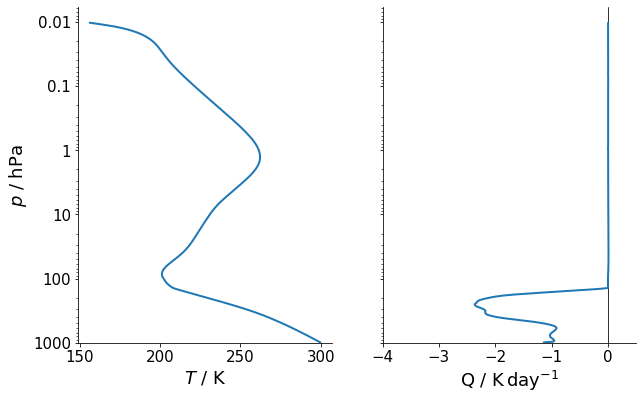

In [2]:
phlev = konrad.utils.get_quadratic_pgrid(num=256)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

rrtmg = konrad.radiation.RRTMG()


rce = konrad.RCE(
    atmosphere=atmosphere,
    humidity=konrad.humidity.FixedRH(konrad.humidity.VerticallyUniform(0.8)),
    surface=konrad.surface.FixedTemperature(temperature=300.0),
    max_duration="100d",
    timestep="12h",
)
rce.run()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)
ty.plots.profile_p_log(atmosphere["plev"], atmosphere["T"][-1], ax=ax0)
ax0.set_ylabel("$p$ / hPa")
ax0.set_xlabel("$T$ / K")

ax1.axvline(0, color="k", linewidth=0.8)
ty.plots.profile_p_log(atmosphere["plev"], rce.radiation["net_htngrt"][-1], ax=ax1)
ax1.set_xlabel("Q / $\sf K\,day^{-1}$")
ax1.set_xlim(-4, 0.5)
ax1.set_ylim(bottom=phlev.max())

## Conceptual cloud

(100000.00000000001, 0.5829979815268262)

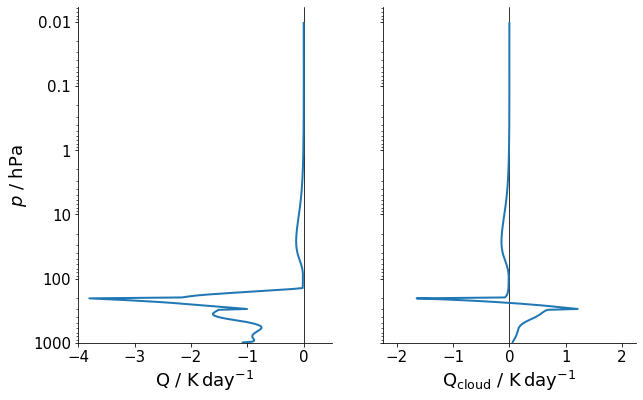

In [3]:
single_cloud = konrad.cloud.ConceptualCloud(
    atmosphere,  # required for consistent coordinates
    cloud_top=200e2,  # in Pa
    depth=100e2,  # in Pa
    phase="ice",  # "ice" or "liquid"
    water_path=24.0,  # in g/m^3
    cloud_fraction=0.3,  # [0-1]
)

rrtmg = konrad.radiation.RRTMG()
rrtmg.update_heatingrates(
    atmosphere=atmosphere,
    cloud=single_cloud,
)

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)
ax0.axvline(0, color="k", linewidth=0.8)
ty.plots.profile_p_log(atmosphere["plev"], rrtmg["net_htngrt"][-1], ax=ax0)
ax0.set_xlabel("Q / $\sf K\,day^{-1}$")
ax0.set_xlim(-4, 0.5)
ax0.set_ylabel("$p$ / hPa")
ax0.set_ylim(bottom=phlev.max())

ax1.axvline(0, color="k", linewidth=0.8)
ty.plots.profile_p_log(atmosphere["plev"], rrtmg["net_htngrt"][-1] - rrtmg["net_htngrt_clr"][-1], ax=ax1)
ax1.set_xlabel("$\sf Q_\mathrm{cloud}$ / $\sf K\,day^{-1}$")
ax1.set_xlim(-2.25, 2.25)
ax1.set_ylim(bottom=phlev.max())